<a href="https://colab.research.google.com/github/ayush2444/LetsGrowMore-Internship-/blob/main/Stock_price_prediction_2_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Let's Grow More Data Science Virtual Internship Program July 2023

###BY: Ayush shrivastava

###BEGINNER LEVEL TASK

###Task 2 - Stock Price Prediction and Forecasting using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df.shape

(2035, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


####NO Null Values found

In [9]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

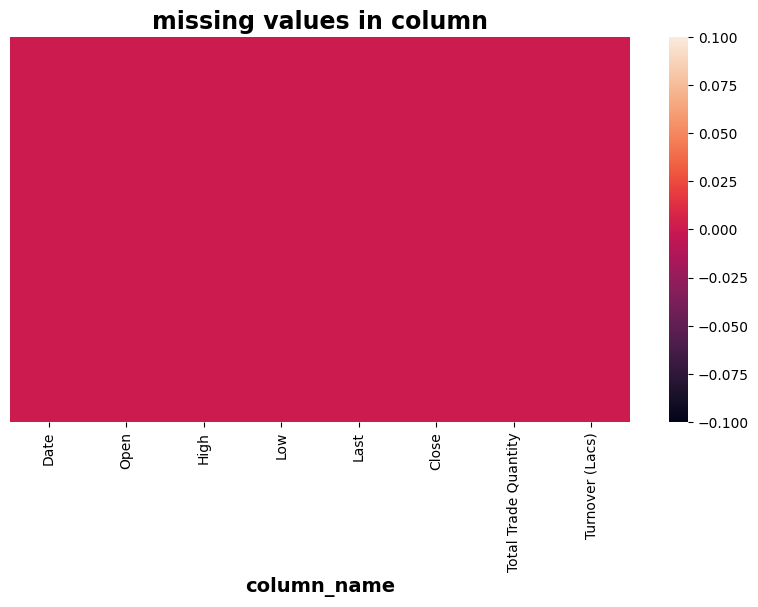

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()


##EDA Analysis

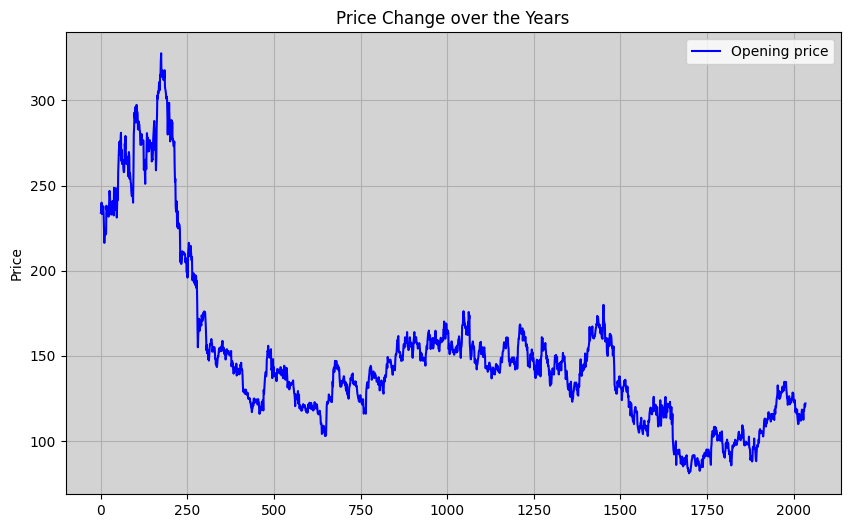

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')  # Set the background color

df['Open'].plot(kind='line', color='b', label="Opening price", ax=ax)

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Price Change over the Years")
plt.grid()
plt.show()


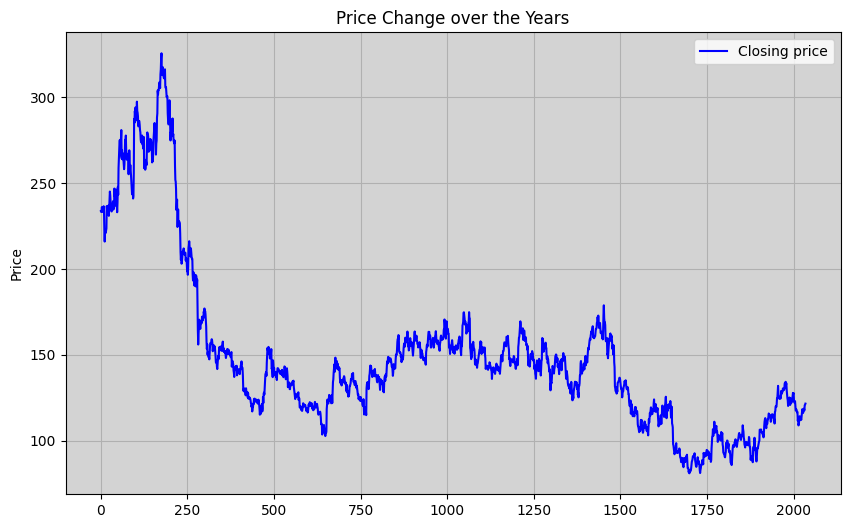

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')  # Set the background color

df['Close'].plot(kind='line', color='b', label="Closing price", ax=ax)

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Price Change over the Years")
plt.grid()
plt.show()


In [13]:
import pandas as pd
import plotly.graph_objects as go

# Read the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                    open=df['Open'],
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close'])])

# Customize the layout
fig.update_layout(title='Stock Price',
                  xaxis_title='Date',
                  yaxis_title='Price')

# Display the chart
fig.show()


<ipython-input-14-d8854c7696df>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 0, 'Open'),
 Text(1.5, 0, 'High'),
 Text(2.5, 0, 'Low'),
 Text(3.5, 0, 'Last'),
 Text(4.5, 0, 'Close'),
 Text(5.5, 0, 'Total Trade Quantity'),
 Text(6.5, 0, 'Turnover (Lacs)')]

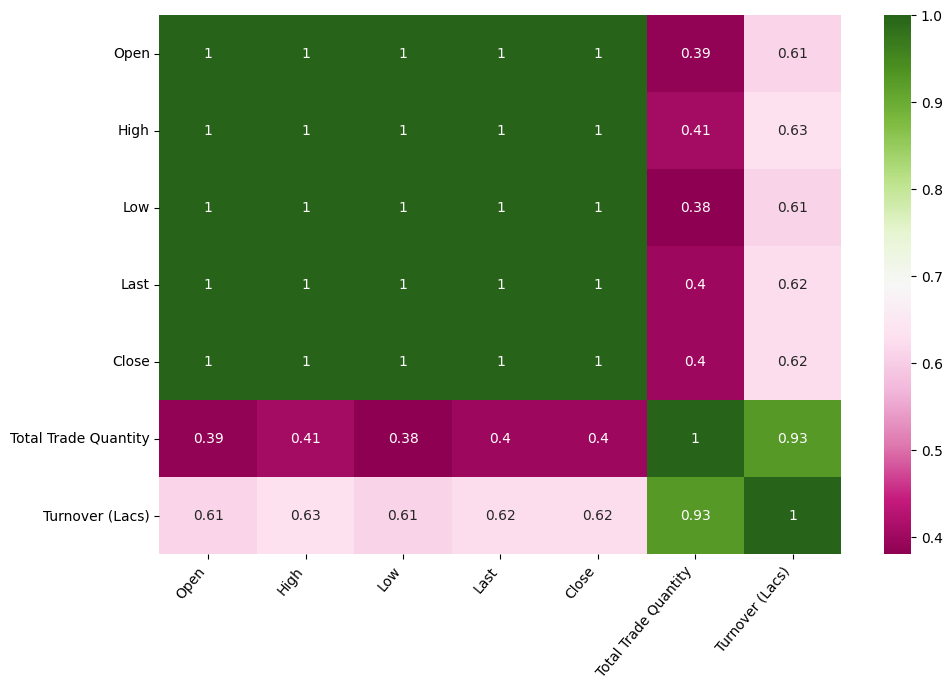

In [14]:
plt.figure(figsize=(11,7))
corr = sns.heatmap(df.corr(),cmap='PiYG',annot=True)
corr.set_xticklabels(corr.get_xticklabels(),horizontalalignment='right',  rotation=50 )


In [15]:
df.shape

(2035, 8)

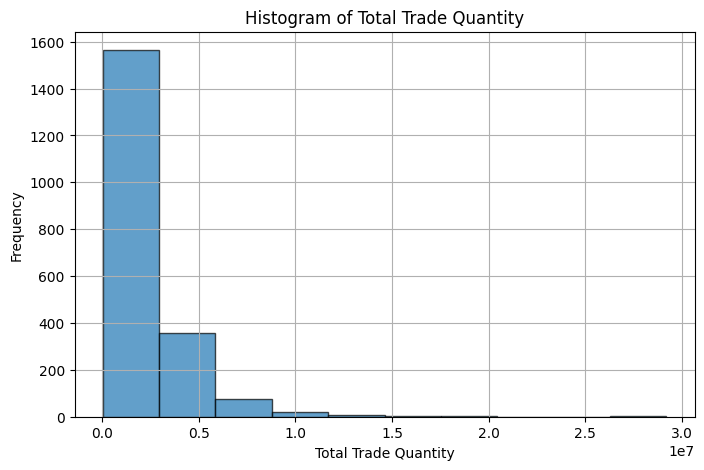

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(df['Total Trade Quantity'], bins=10, edgecolor='black', alpha=0.7)

plt.xlabel('Total Trade Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Total Trade Quantity')

plt.grid(True)
plt.show()


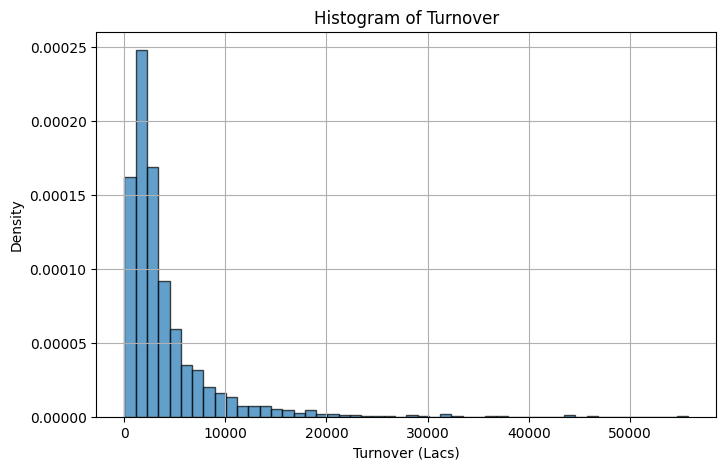

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(df['Turnover (Lacs)'], bins=50, density=True, edgecolor='black', alpha=0.7)

plt.xlabel('Turnover (Lacs)')
plt.ylabel('Density')
plt.title('Histogram of Turnover')

plt.grid(True)
plt.show()


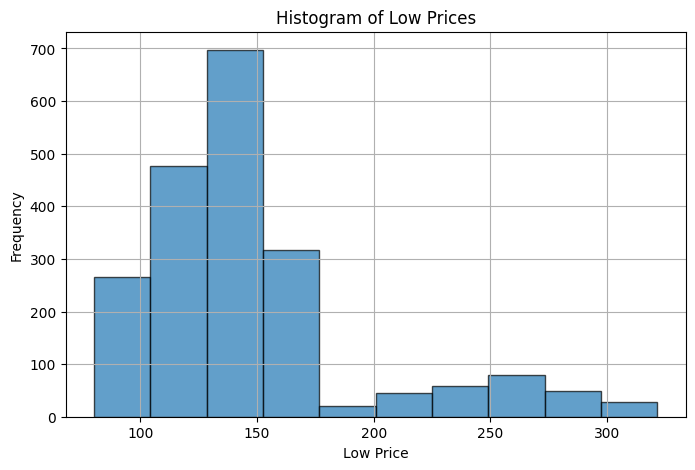

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(df['Low'], bins=10, edgecolor='black', alpha=0.7)

plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.title('Histogram of Low Prices')
plt.grid(True)

plt.show()


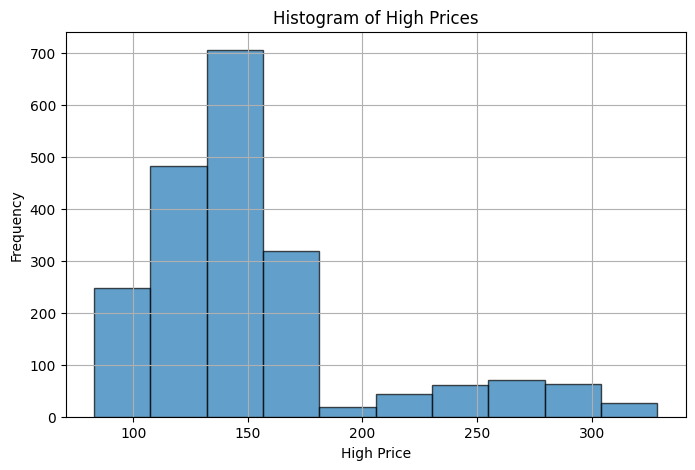

In [19]:

plt.figure(figsize=(8, 5))
plt.hist(df['High'], bins=10, edgecolor='black', alpha=0.7)

plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.title('Histogram of High Prices')
plt.grid(True)

plt.show()


###Detect Outlier

<Axes: title={'center': ' Outliers  visualization in Volume attribute'}>

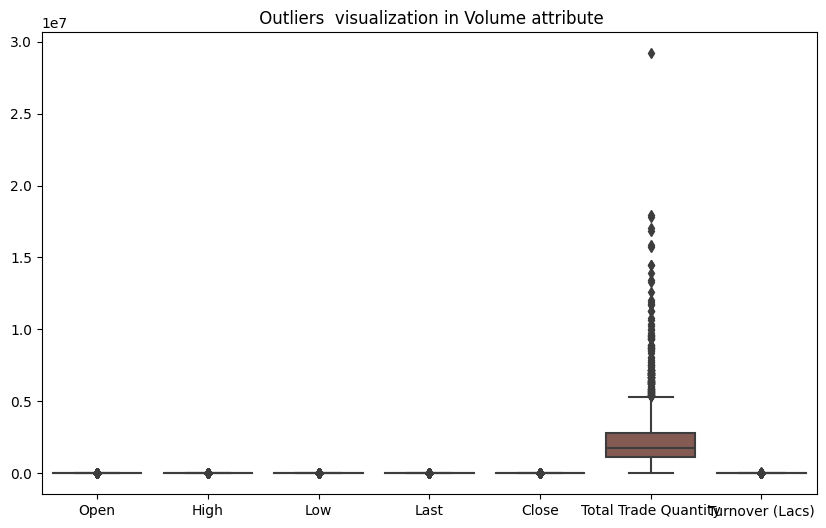

In [20]:
plt.figure(figsize=(10,6))
plt.title(" Outliers  visualization in Volume attribute")
sns.boxplot(data=df)

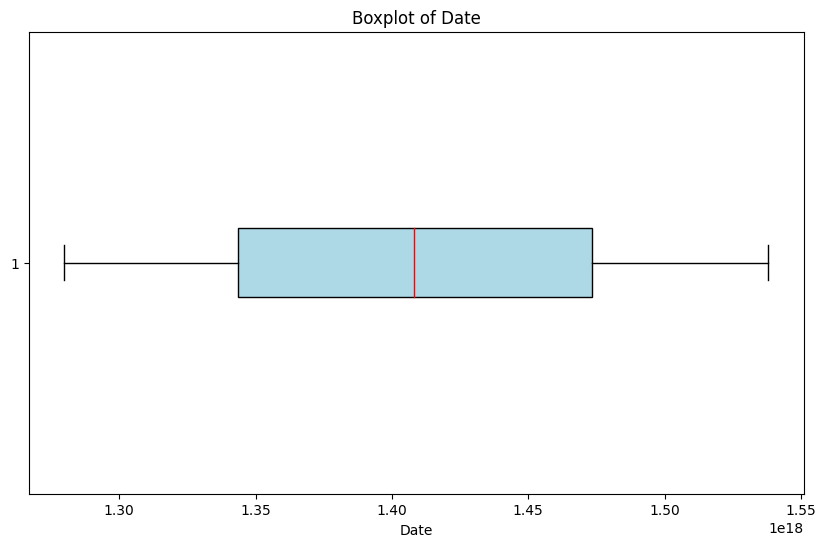

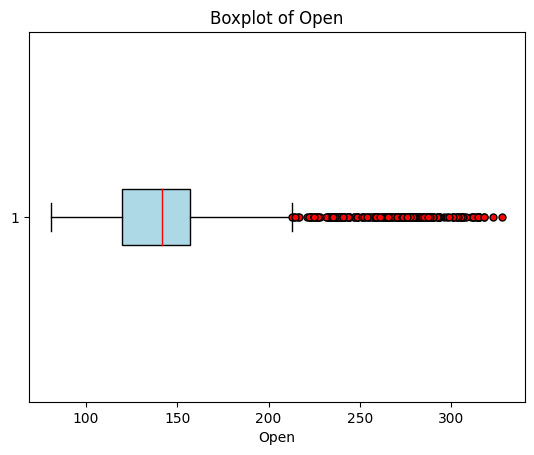

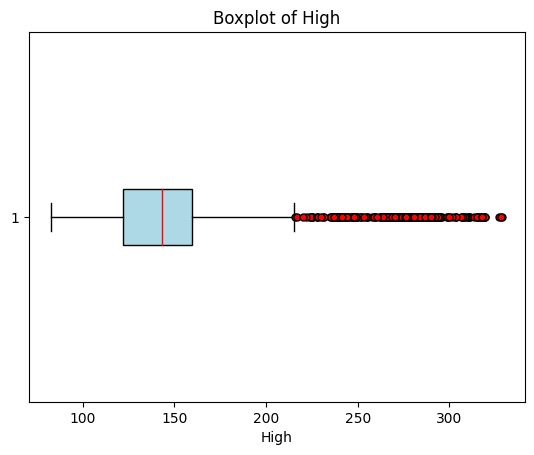

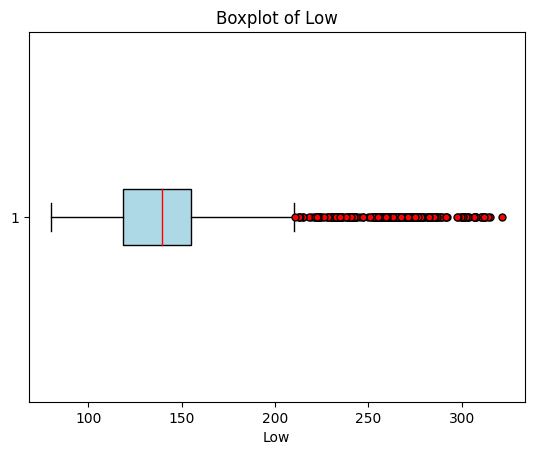

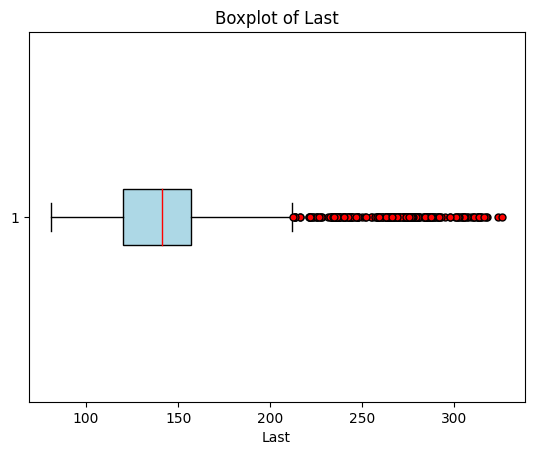

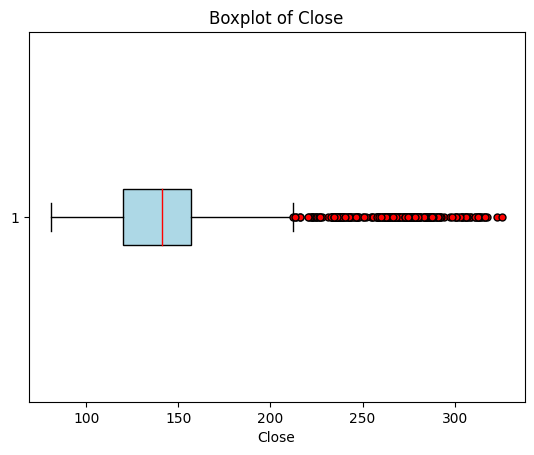

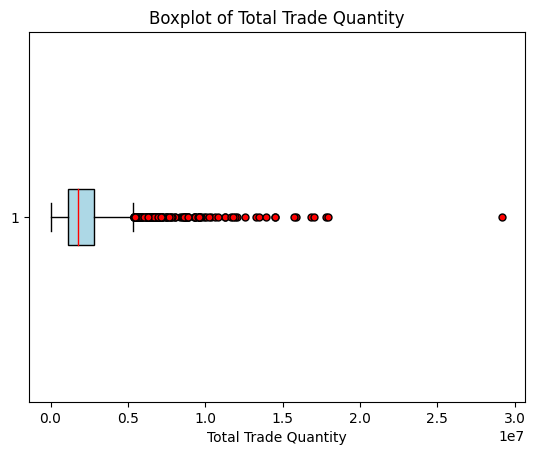

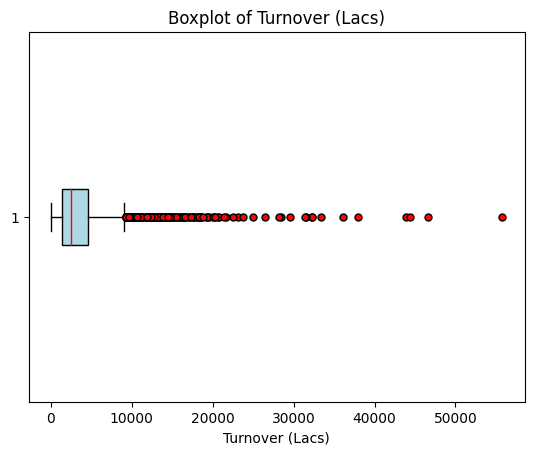

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

column_names = ['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']

plt.figure(figsize=(10, 6))

for column_name in column_names:
    data = pd.to_numeric(df[column_name])
    plt.boxplot(data, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
    plt.xlabel(column_name)
    plt.title('Boxplot of ' + column_name)
    plt.show()


In [23]:
def detect_outliers(stock_df):
    data = sorted(stock_df)
    q1, q2, q3 = np.percentile(data, [25, 50, 75])
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5*IQR, q3 + 1.5*IQR
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}, IQR: {IQR}")


    outliers = [i for i in data if i < lower_bound or i > upper_bound]
    num_outliers = len(outliers)
    perc_outliers = round(num_outliers * 100 / len(data), 2)
    print(f"Total number of outliers are: {num_outliers}")
    print(f"Total percentage of outlier is: {round(perc_outliers*100/len(data),2)} %")


    results = (
        q1, q2, q3,
        IQR,
        lower_bound, upper_bound,
        outliers,
        num_outliers,
        perc_outliers
    )
    return results



In [24]:
for feature in column_names:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

Date :
q1:2012-07-28 12:00:00, q2:2014-08-14 00:00:00, q3:2016-09-10 12:00:00
Lower bound: 2006-05-24 00:00:00, Upper bound: 2022-11-16 00:00:00, IQR: 1505 days 00:00:00
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Open :
q1:120.025, q2:141.5, q3:157.175
Lower bound: 64.3, Upper bound: 212.90000000000003, IQR: 37.150000000000006
Total number of outliers are: 233
Total percentage of outlier is: 0.56 %


High :
q1:122.1, q2:143.4, q3:159.4
Lower bound: 66.14999999999998, Upper bound: 215.35000000000002, IQR: 37.30000000000001
Total number of outliers are: 233
Total percentage of outlier is: 0.56 %


Low :
q1:118.3, q2:139.6, q3:155.14999999999998
Lower bound: 63.02500000000003, Upper bound: 210.42499999999995, IQR: 36.84999999999998
Total number of outliers are: 232
Total percentage of outlier is: 0.56 %


Last :
q1:120.07499999999999, q2:141.1, q3:156.925
Lower bound: 64.79999999999995, Upper bound: 212.20000000000005, IQR: 36.85000000000002
Total number of ou

In [25]:
data_Close =df.reset_index()['Close']
data_Close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

<Axes: >

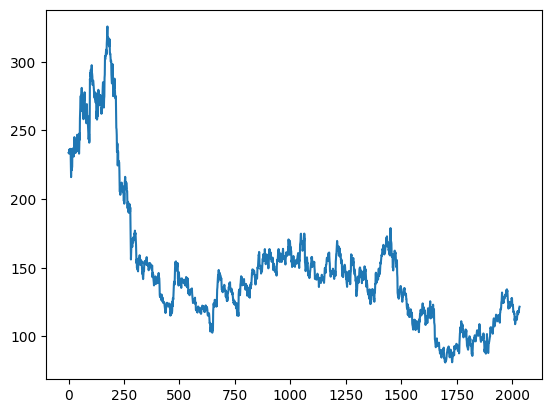

In [26]:
data_Close.plot()

In [27]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
Scaled_data = Scaler.fit_transform(np.array(data_Close).reshape(-1,1))
Scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [29]:
Scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

###TrainTest Split

In [30]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(Scaled_data, test_size=0.2, shuffle=False)

In [31]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1435866 ],
       [0.13419118],
       [0.1431781 ]])

In [32]:
test_data

array([[0.16115196],
       [0.16176471],
       [0.17320261],
       [0.18218954],
       [0.16237745],
       [0.13112745],
       [0.15931373],
       [0.15951797],
       [0.14808007],
       [0.16278595],
       [0.15625   ],
       [0.16319444],
       [0.16360294],
       [0.16278595],
       [0.16544118],
       [0.15522876],
       [0.17197712],
       [0.1503268 ],
       [0.13255719],
       [0.14338235],
       [0.15849673],
       [0.1186683 ],
       [0.11519608],
       [0.10947712],
       [0.0692402 ],
       [0.06597222],
       [0.05841503],
       [0.05044935],
       [0.04534314],
       [0.04779412],
       [0.05290033],
       [0.04922386],
       [0.06638072],
       [0.07169118],
       [0.05392157],
       [0.04881536],
       [0.04881536],
       [0.05310458],
       [0.04963235],
       [0.05065359],
       [0.05126634],
       [0.04963235],
       [0.05902778],
       [0.05555556],
       [0.04084967],
       [0.03737745],
       [0.03737745],
       [0.026

In [33]:
time_step = 100
x_train = np.array([train_data[i : i + time_step, 0] for i in range(len(train_data) - time_step - 1)])
y_train = np.array([train_data[i + time_step, 0] for i in range(len(train_data) - time_step - 1)])


In [34]:
x_test = np.array([test_data[i : i + time_step, 0] for i in range(len(test_data) - time_step - 1)])
y_test = np.array([test_data[i + time_step, 0] for i in range(len(test_data) - time_step - 1)])


In [35]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100)
Y_train shape : (1527,)
X_test shape  : (306, 100)
Y_test shape  : (306,)


In [36]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test  = x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [37]:
x_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.83455882],
        [0.86213235],
        [0.85273693]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.86213235],
        [0.85273693],
        [0.87111928]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.85273693],
        [0.87111928],
        [0.84497549]],

       ...,

       [[0.18811275],
        [0.17034314],
        [0.1621732 ],
        ...,
        [0.16115196],
        [0.15175654],
        [0.14644608]],

       [[0.17034314],
        [0.1621732 ],
        [0.15972222],
        ...,
        [0.15175654],
        [0.14644608],
        [0.15216503]],

       [[0.1621732 ],
        [0.15972222],
        [0.16278595],
        ...,
        [0.14644608],
        [0.15216503],
        [0.1435866 ]]])

In [38]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)


X_train shape : (1527, 100, 1)
Y_train shape : (1527,)
X_test shape  : (306, 100, 1)
Y_test shape  : (306,)


In [39]:
pip install tensorflow

In [40]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adagrad', metrics='acc')

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 64)           16896     
                                                                 
 lstm_4 (LSTM)               (None, 100, 64)           33024     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,009
Trainable params: 83,009
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64,verbose = 1)

Epoch 1/10
24/24 [==============================] - 6s 263ms/step - loss: 5.9321e-04 - accuracy: 6.5488e-04 - val_loss: 3.4772e-04 - val_accuracy: 0.0000e+00
Epoch 2/10
24/24 [==============================] - 7s 295ms/step - loss: 5.4013e-04 - accuracy: 6.5488e-04 - val_loss: 3.3553e-04 - val_accuracy: 0.0000e+00
Epoch 3/10
24/24 [==============================] - 6s 245ms/step - loss: 5.8251e-04 - accuracy: 6.5488e-04 - val_loss: 3.6786e-04 - val_accuracy: 0.0000e+00
Epoch 4/10
24/24 [==============================] - 7s 288ms/step - loss: 5.3889e-04 - accuracy: 6.5488e-04 - val_loss: 3.1077e-04 - val_accuracy: 0.0000e+00
Epoch 5/10
24/24 [==============================] - 6s 258ms/step - loss: 5.4346e-04 - accuracy: 6.5488e-04 - val_loss: 3.6762e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
24/24 [==============================] - 7s 294ms/step - loss: 5.1406e-04 - accuracy: 6.5488e-04 - val_loss: 2.8641e-04 - val_accuracy: 0.0000e+00
Epoch 7/10
24/24 [==============================] - 

In [46]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

10/10 [==============================] - 1s 52ms/step


In [47]:
train_predict=Scaler.inverse_transform(train_pred)
test_predict1=Scaler.inverse_transform(test_pred)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
lookback = 100

train_pred_plot = np.empty_like(Scaled_data)
train_pred_plot[:] = np.nan
train_pred_plot[lookback:len(train_pred)+lookback, :] = train_pred

test_pred_plot = np.empty_like(Scaled_data)
test_pred_plot[:] = np.nan
test_pred_plot[len(train_pred)+(lookback*2)+1:len(Scaled_data)-1, :] = test_pred


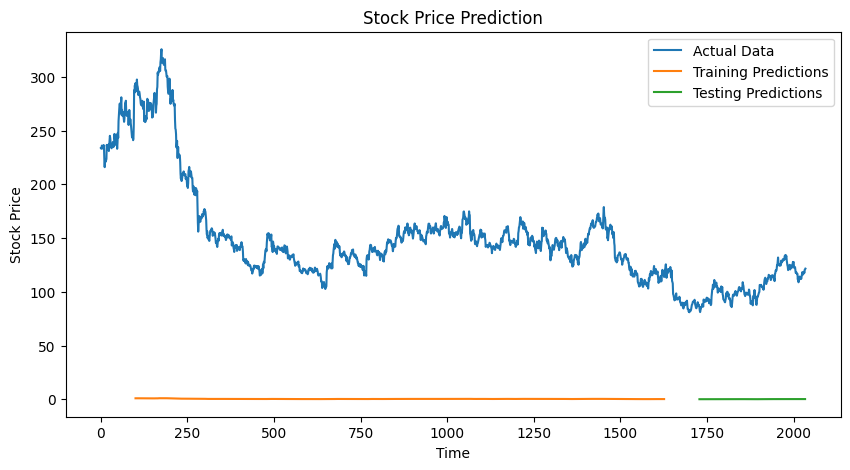

In [50]:
plt.figure(figsize=(10, 5))

plt.plot(Scaler.inverse_transform(Scaled_data), label='Actual Data')
plt.plot(train_pred_plot, label='Training Predictions')
plt.plot(test_pred_plot, label='Testing Predictions')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()

plt.show()
